# KNN - Confusion Matrix

In [1]:
# 載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# 匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
# index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
# 由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
# 載入標準化比例尺(StandardScaler)套件，只將所有特徵值做標準化
from sklearn.preprocessing import StandardScaler

# 初始化標準化
scaler = StandardScaler()
# 訓練標準化，排除'TARGET CLASS'欄位
scaler.fit(df.drop('TARGET CLASS', axis=1))
# 標準化特徵值
scaler_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))
# 將標準化後的特徵值轉換回DataFrame
df_feature = pd.DataFrame(scaler_feature, columns=df.columns[:-1])
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [4]:
# 將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

# 定義特徵值和目標值
X = df_feature
y = df['TARGET CLASS']
# 分割資料，測試組佔比30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# 使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

# 使用k=1進行模型訓練和預測
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# 測試KNN演算法的效果
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[134   8]
 [ 11 147]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# 計算不同k值的錯誤率

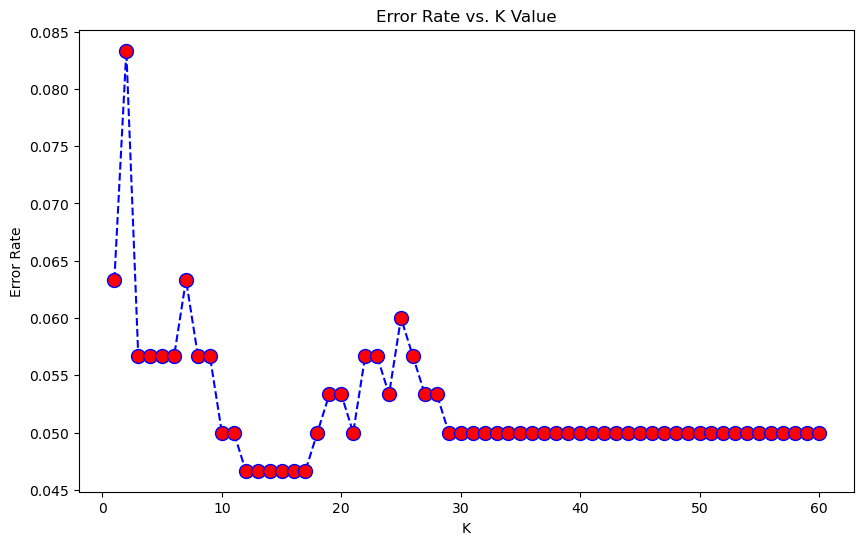

In [6]:
# 計算不同k值的錯誤率
# 剛剛只先用了k=1來建立模型，利用迴圈(選擇不同k值)，並紀錄錯誤率

error_rate = []
# 測試k值從1到60
for i in range(1, 61):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# 繪製錯誤率與k值的關係圖
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 61), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

當 𝑘值接近 30 時，錯誤率穩定在 5% 左右，並且之後基本保持不變。

# 比較不同k值的效果
來看precision、recall、f1-score、support表現

In [7]:
# 使用k=1進行模型訓練和預測
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH k=1


[[134   8]
 [ 11 147]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [8]:
# 使用錯誤率最低最低k值進行模型訓練和預測
optimal_k = error_rate.index(min(error_rate)) + 1
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(f'WITH k={optimal_k}')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH k=12


[[136   6]
 [  8 150]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [9]:
# 使用最佳k值進行模型訓練和預測
optimal_k = 30
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# 顯示結果
print(f'WITH k={optimal_k}')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH k=30


[[135   7]
 [  8 150]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

